In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.array([[1,1], [0,0], [0.5,0.5],
              [0,1], [1,0], [11,11], [10,10],[10.5,10.5],[10,11],[11,10]
             ])

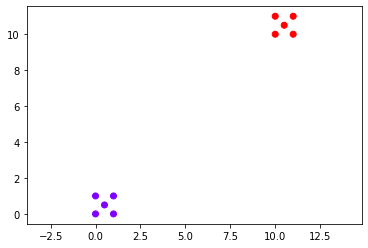

In [3]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 4))

# Plot the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

### k means

In [4]:
from sklearn.cluster import KMeans

In [5]:
centers = np.array([[-1,1],[1,-1]])
kmeans = KMeans(n_clusters=2,init=centers,algorithm='full')


In [6]:
kmeans.fit(X)

<ipython-input-6-28568fcd941d>:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  kmeans.fit(X)


KMeans(algorithm='full', copy_x=True, init=array([[-1,  1],
       [ 1, -1]]),
       max_iter=300, n_clusters=2, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [7]:
labels = kmeans.predict(X)
print(labels)

[0 0 0 0 1 0 0 0 0 1]


In [8]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.375 5.625]
 [6.    5.   ]]


In [9]:
print(X[:,0].shape,X[:,1].shape)

(10,) (10,)


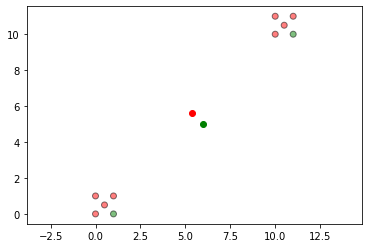

In [10]:
colmap = {1: 'r', 2: 'g', 3:'y'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(X[:,0],X[:,1], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.axis('equal')
plt.show()

### ratio cut

In [11]:
#adjacency matrix
W = np.array([[0,1,1,1,0,0,0,0,0,0],
              [1,0,1,0,1,0,0,1,0,0],
              [1,1,0,1,1,0,0,0,0,0],
              [1,0,1,0,1,0,0,0,0,0],
              [0,1,1,1,0,0,0,0,0,0],
              [0,0,0,0,0,0,1,1,0,1],
              [0,0,0,0,0,1,0,0,1,1],
              [0,1,0,0,0,1,0,0,1,1],
              [0,0,0,0,0,0,1,1,0,1],
              [0,0,0,0,0,1,1,1,1,0],      
             ])

In [13]:
# degree matrix
D = np.diag(np.sum(W, axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[3 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 4]]
laplacian matrix:
[[ 3 -1 -1 -1  0  0  0  0  0  0]
 [-1  4 -1  0 -1  0  0 -1  0  0]
 [-1 -1  4 -1 -1  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0]
 [ 0 -1 -1 -1  3  0  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1  0 -1]
 [ 0  0  0  0  0 -1  3  0 -1 -1]
 [ 0 -1  0  0  0 -1  0  4 -1 -1]
 [ 0  0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0 -1 -1 -1 -1  4]]


In [21]:
import scipy as sp
val,vec = sp.linalg.eigh(L)
val

array([1.06581410e-14, 2.67949192e-01, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.73205081e+00, 5.00000000e+00, 5.00000000e+00,
       5.00000000e+00, 6.00000000e+00])

In [22]:
v = vec[:,1] #second smallest eigen vector
v

array([-0.32941482, -0.20884063, -0.32941482, -0.36172258, -0.32941482,
        0.32941482,  0.36172258,  0.20884063,  0.32941482,  0.32941482])

In [23]:
labels = []
for i in range(len(v)):
#     print(i)
    if v[i]<0:
        labels.append(0)
    else:
        labels.append(1)
        

In [24]:
print(labels)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


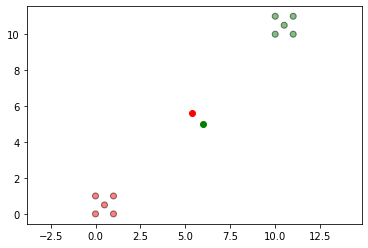

In [25]:
colmap = {1: 'r', 2: 'g', 3:'y'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(X[:,0],X[:,1], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])

plt.axis('equal')
plt.show()